## Revtsov HW1

In [122]:
library(PerformanceAnalytics)
library(quantmod)

## Problem 1

In [145]:
nvda <- getSymbols("PEP", from="2023-01-01", to="2024-01-01", auto.assign=FALSE)
nvda.prices <- nvda$PEP.Close

In [146]:
head(nvda)

           PEP.Open PEP.High PEP.Low PEP.Close PEP.Volume PEP.Adjusted
2023-01-03   180.59   180.75  176.57    179.41    5137400     174.4034
2023-01-04   179.41   180.54  177.55    178.97    4771300     173.9756
2023-01-05   177.96   178.77  176.86    177.10    3647100     172.1578
2023-01-06   178.81   181.83  178.80    181.10    3713200     176.0462
2023-01-09   180.44   182.77  178.81    179.33    3319200     174.3256
2023-01-10   178.79   179.53  177.09    177.85    3817300     172.8869

#### Part a

In [147]:
head(nvda[nvda$PEP.Close == nvda$PEP.Adjusted])

           PEP.Open PEP.High PEP.Low PEP.Close PEP.Volume PEP.Adjusted
2023-11-30   166.11   168.36  164.82    168.29    7346700       168.29
2023-12-01   168.37   168.85  167.38    168.69    4893900       168.69
2023-12-04   168.40   169.92  168.19    169.14    5323300       169.14
2023-12-05   169.15   169.57  167.71    167.94    4553800       167.94
2023-12-06   167.98   168.32  166.73    167.51    4726600       167.51
2023-12-07   168.00   168.30  166.70    167.46    4934800       167.46

2012-12-05 is the earliest date at which closing and adjusted prices are equal. This is the ex-date of the most recent dividend and therefore this is the first date the cumulative adjustment factor is 1.

#### Part b

In [148]:
# get dividend data
(nvda_divs <- getDividends("PEP", from="2023-01-01", to="2024-01-01", auto.assign=FALSE))
# merge with close prices and fill NA dividends with zeros (that means no divs that day)
nvda_divs <- na.fill(merge(nvda.prices, nvda_divs), fill=0)

           PEP.div
2023-03-02   1.150
2023-06-01   1.265
2023-08-31   1.265
2023-11-30   1.265

In [149]:
# calculate the cumulative adjustment factor
adj_factor <- ((nvda_divs$PEP.Close - na.fill(lag(nvda_divs$PEP.div, k=-1), fill=0)) / nvda_divs$PEP.Close)
# reversing the array x2 may not be the most computationally efficient approach...
adj_factor <- rev(cumprod(rev(adj_factor)))

In [150]:
# calculate adjusted prices
adj_prices <- adj_factor * as.zoo(nvda_divs$PEP.Close)

Compare recomputed adjusted prices and the ones pulled from yahoo. Pretty close.

In [151]:
length(nvda$PEP.Adjusted)

[1] 250

In [152]:
max(abs(adj_prices - nvda$PEP.Adjusted))

Warning message in eval(expr, envir, enclos):
"Incompatible methods ("Ops.zoo", "Ops.xts") for "-""


[1] 3.25215e-05

## Prof Method

In [154]:
# Adjust for December 5 dividend
m <- (coredata(nvda.prices["2023-11-29"]) - 1.265) / coredata(nvda.prices["2023-11-29"])
coredata(nvda.prices["2023-01-01::2023-11-29"]) <-
coredata(nvda.prices["2023-01-01::2023-11-29"]) * as.numeric(m)
#Adjust for September 6 dividend
m <- (coredata(nvda.prices["2023-08-30"]) - 1.265) / coredata(nvda.prices["2023-08-30"])
coredata(nvda.prices["2023-01-01::2023-08-30"]) <-
coredata(nvda.prices["2023-01-01::2023-08-30"]) * as.numeric(m)
# Adjust for June 7 dividend
m <- (coredata(nvda.prices["2023-05-31"]) - 1.265) / coredata(nvda.prices["2023-05-31"])
coredata(nvda.prices["2023-01-01::2023-05-31"]) <-
coredata(nvda.prices["2023-01-01::2023-05-31"]) * as.numeric(m)
# Adjust for March 7 dividend
m <- (coredata(nvda.prices["2023-03-01"]) -  1.15) / coredata(nvda.prices["2023-03-01"])
coredata(nvda.prices["2023-01-01::2023-03-01"]) <-
coredata(nvda.prices["2023-01-01::2023-03-01"]) * as.numeric(m)

In [155]:
abs(adj_prices - nvda$NVDA.Adjusted)

2023-01-03 2023-01-04 2023-01-05 2023-01-06 2023-01-09 2023-01-10 2023-01-11 
        NA         NA         NA         NA         NA         NA         NA 
2023-01-12 2023-01-13 2023-01-17 2023-01-18 2023-01-19 2023-01-20 2023-01-23 
        NA         NA         NA         NA         NA         NA         NA 
2023-01-24 2023-01-25 2023-01-26 2023-01-27 2023-01-30 2023-01-31 2023-02-01 
        NA         NA         NA         NA         NA         NA         NA 
2023-02-02 2023-02-03 2023-02-06 2023-02-07 2023-02-08 2023-02-09 2023-02-10 
        NA         NA         NA         NA         NA         NA         NA 
2023-02-13 2023-02-14 2023-02-15 2023-02-16 2023-02-17 2023-02-21 2023-02-22 
        NA         NA         NA         NA         NA         NA         NA 
2023-02-23 2023-02-24 2023-02-27 2023-02-28 2023-03-01 2023-03-02 2023-03-03 
        NA         NA         NA         NA         NA         NA         NA 
2023-03-06 2023-03-07 2023-03-08 2023-03-09 2023-03-10 2023-03-1

In [156]:
head(abs(adj_prices - nvda.prices), 50)

Warning message in head(abs(adj_prices - nvda.prices), 50):
"Incompatible methods ("Ops.zoo", "Ops.xts") for "-""


            PEP.Close
2023-01-03 0.05322724
2023-01-04 0.05309670
2023-01-05 0.05254191
2023-01-06 0.05372863
2023-01-09 0.05320351
2023-01-10 0.05276442
2023-01-11 0.05282376
2023-01-12 0.05215029
2023-01-13 0.05199009
2023-01-17 0.05223336
2023-01-18 0.05091611
2023-01-19 0.05032572
2023-01-20 0.05039989
2023-01-23 0.05017441
2023-01-24 0.05064020
2023-01-25 0.05100808
2023-01-26 0.05050076
2023-01-27 0.05032275
2023-01-30 0.05028121
2023-01-31 0.05073810
2023-02-01 0.05089831
2023-02-02 0.05042659
2023-02-03 0.05017441
2023-02-06 0.05097545
2023-02-07 0.05089831
2023-02-08 0.05077964
2023-02-09 0.05126026
2023-02-10 0.05227490
2023-02-13 0.05274069
2023-02-14 0.05214733
2023-02-15 0.05221853
2023-02-16 0.05207019
2023-02-17 0.05229863
2023-02-21 0.05226896
2023-02-22 0.05225116
2023-02-23 0.05230753
2023-02-24 0.05220370
2023-02-27 0.05218886
2023-02-28 0.05148277
2023-03-01 0.05083007
2023-03-02 0.02659767
2023-03-03 0.02657158
2023-03-06 0.02662529
2023-03-07 0.02649331
2023-03-08

<html>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
    <br></br>
</html>

## Problem 2

In [112]:
mortgage <- getSymbols("MORTGAGE30US", from="1975-01-01", to="2024-01-01", src='FRED', auto.assign=FALSE)

#### Part a

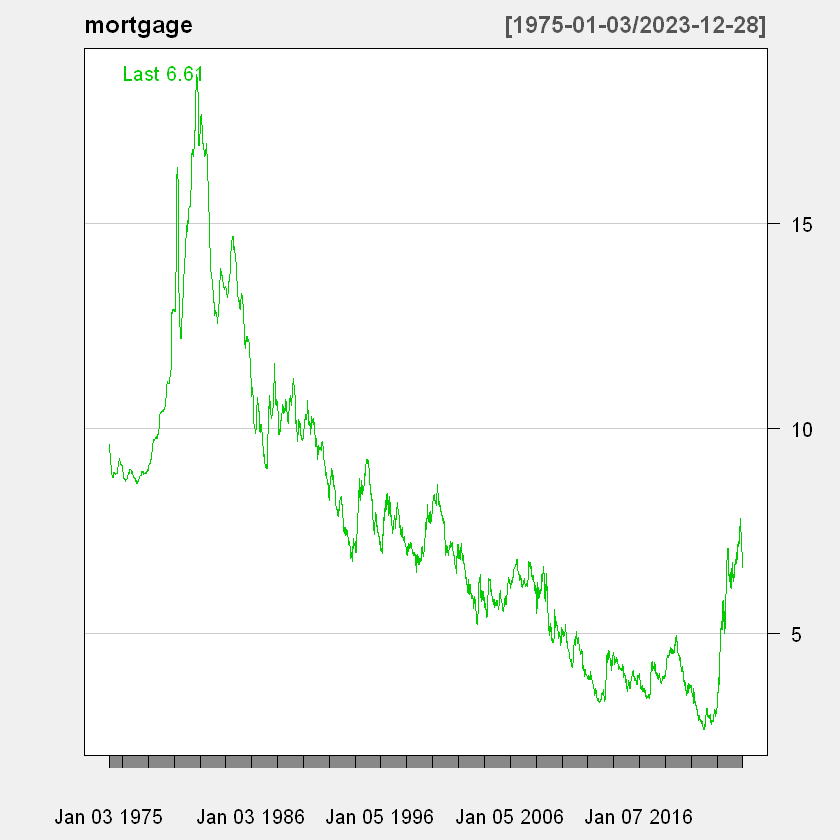

In [113]:
chartSeries(mortgage, theme='white')

##### lowest mortgage rate:

In [114]:
mortgage[which.min(mortgage)]

           MORTGAGE30US
2021-01-07         2.65

##### highest mortgage rate:

In [115]:
mortgage[which.max(mortgage)]

           MORTGAGE30US
1981-10-09        18.63

#### Part b

In [116]:
change <- diff(mortgage)

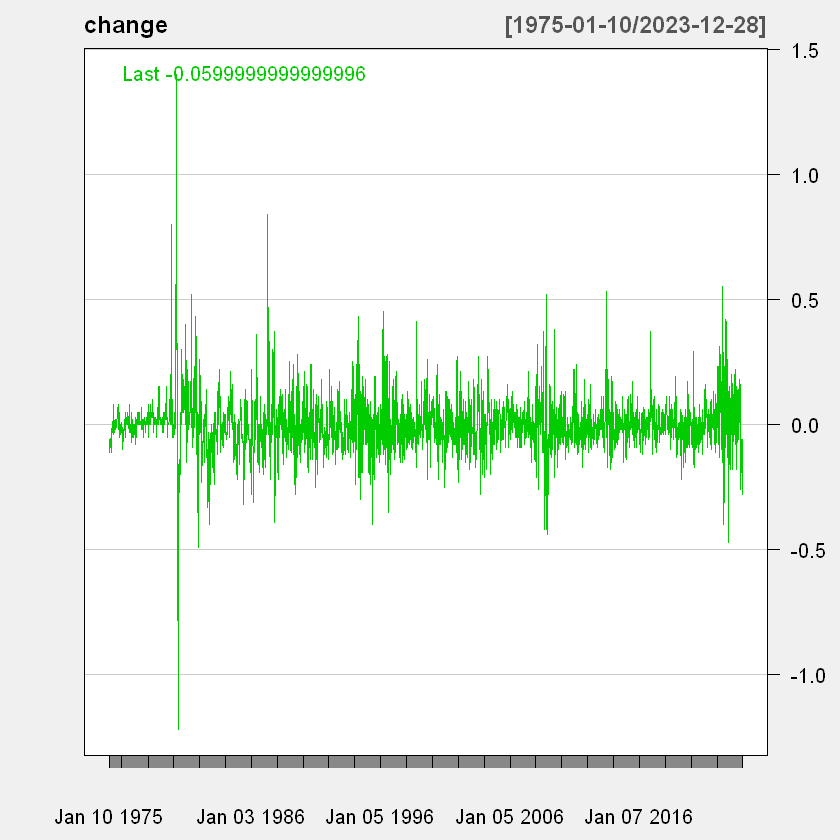

In [117]:
chartSeries(change, theme='white')

##### lowest mortgage rate change:

In [118]:
change[which.min(change)]

           MORTGAGE30US
1980-05-09        -1.22

##### highest mortgage rate change:

In [119]:
change[which.max(change)]

           MORTGAGE30US
1980-03-14          1.4

## Problem 3

In [17]:
cost <- getSymbols("COST", from="2023-01-31", to="2023-03-02", auto.assign=FALSE)
cost_adjusted <- cost[, c('COST.Adjusted')]

#### Part a
Last Trading Day

In [18]:
p0 = coredata(as.vector(cost["2023-01-31", "COST.Adjusted"]))
p1 = coredata(as.vector(cost["2023-02-28", "COST.Adjusted"]))

arithmetic return

In [19]:
(p1 - p0) / p0

[1] -0.05109587

log return

In [20]:
log(p1/p0)

[1] -0.05244751

#### Part b
First Trading Day

In [21]:
p0 = coredata(as.vector(cost["2023-02-01", "COST.Adjusted"]))
p1 = coredata(as.vector(cost["2023-03-01", "COST.Adjusted"]))

arithmetic return

In [22]:
(p1 - p0) / p0

[1] -0.07415705

log return

In [23]:
log(p1/p0)

[1] -0.07705066

#### Part c
End of month pries are used in the below approach. This makes sense, since the return of a stock for the month begins when the month closes. The approach in part b (first day of the month) effectively ignores the return on the first day, but includes return on the first day of the following month.

In [24]:
na.omit(Return.calculate(to.monthly(cost)))$cost.Adjusted["2023-02"]

         cost.Adjusted
Feb 2023   -0.05109587